In [1]:
import pandas as pd
import os

### 23 Sep 2024

One final thing I'll need to learn about is working with dates. During my bootcamp, there was a "dealing with dates" module that was optional, and given that the mandatory coursework was so demanding, I never had time to get to that particular optional module. However, since I'll be working with dates in both my Conference Calculator and my Come, Follow Me Calculator, I figure now is as good a time as any to establish a solid foundation of understanding and working with dates so I can work with them competently. 

I should also note that I did work through the majority of this optional module a few days ago, but Github Desktop was not able to upload the changes to my GitHub repository, and in the process of trying to figure out how to resolve the errors that GitHub Desktop was encountering, I lost the hour or so's work I did on learning the dates. I'll work through the material provided in the module again - review can't hurt, and I want to have all the information I can have available for when I get back to my ongoing calculator project.

Python has a built in `datetime` module, and recognizes `date` type objects (in addition to integer `int` and `float` and other string `object` objects.)

Pandas, however, offers more tools and flexibility for finding and making calculations with dates. It has it's own methods (such as `to_datetime()`), and can convert a string `object` to a `datetime64` object. 

Below I'll create a dataframe with a few dates in it. The dataframe will consist of one list of indices (0,1,2, and 3) and the other a list of random datetimes. 

In [15]:
df = pd.DataFrame({'index':[0,1,2,3],'date':['01-09-18 15:23:11','02-09-18 17:21:45', '09-03-18 19:11:56', '20-12-18 10:15:31']})

I'll also create a copy of the dataframe in case I need to revert to or work with the original. 

In [16]:
df_copy = df.copy()

The cell below displays the data types contained in the dataframe. The "index" column contains integers, and the "date" columns contains string `objects`.

In [18]:
df.dtypes

index     int64
date     object
dtype: object

Because dates often appear as string `objects`, as in the dataframe I've created, `to_datetime()` is an excellent method for converting a string to a `datetime64` object, which will make it more useful when conducting data analysis and other calculations using Pandas. I can employ the method by calling pandas `pd`, stating the method `to_datetime()`, and putting the information I want converted in the parentheses. The two cells below demonstrate two different ways of calling the "date" column of the df dataframe, and both work equally well. 

In [19]:
pd.to_datetime(df.date)

C:\Users\bfran\AppData\Local\Temp\ipykernel_11144\1927097914.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df.date)


0   2018-01-09 15:23:11
1   2018-02-09 17:21:45
2   2018-09-03 19:11:56
3   2018-12-20 10:15:31
Name: date, dtype: datetime64[ns]

In [20]:
pd.to_datetime(df['date'])

C:\Users\bfran\AppData\Local\Temp\ipykernel_11144\1829355199.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date'])


0   2018-01-09 15:23:11
1   2018-02-09 17:21:45
2   2018-09-03 19:11:56
3   2018-12-20 10:15:31
Name: date, dtype: datetime64[ns]

The warning given states that because I did not tell the `to_datetime` method what format to find dates in, it assumed one. Date time objects are stored as `yyyy-mm-dd hh:mm:ss`, so from largest denomination of time to smallest. Notice that the conversion assumed that the first two digits in the date strings were the month, the second two were the day of the month, and the last four as the year, except in the case of the last date, where it recognized that even though 20 was the first two digits, there is no 20th month. Using that knowledge, it was able to deduce that in that row that 20 must be the day, and that 12 must be the month. It made that deduction only for that row, and not the others. 

But what if **all** the dates in my dataframe were meant to be formatted as dd-mm-yyyy? It's pretty ambiguous with the first three dates, because there are both months and days numbered 1, 2, 3, and 9. The only row where it's clear that the first two digits are the day is the fourth row, because there is no 20th month. If all the dates in my string were formatted that what, I'd need to tell my `to_datetime()` method what format it should expect to find the dates to be in using the `format` parameter (or setting).

**NOTE**: Even if I tell it what format to *find* the dates in, it will still *save* them in `yyyy-mm-dd hh:mm:ss` format. 

When setting the `format` parameter, each element of the date is represented by the combination of the percentage symbol "%" and a letter. In our case:

* %d represents the day of the month in 2 digit format
* %m represents the month in 2 digit format.
* %y represents the year in 2 digit format. Example: 23 (not 2023)
* %Y represents the year in 4 digit format. Example: 2023 (not 23)
Similar to the date, the elements referring to the date are represented by the same set of letters, while those of the hour do so by default by the following set:

* %H represents the hour.
* %M represents the minutes.
* %S represents the seconds.
* %f represents the microseconds.

See farther down for a more comprehensive list of datetime abbreviations. 

In the cell below, I'll create two new columns in my dataframe. The first "date_2" will have the converted dates as it defaults. The second "date_3" will have the converted dates where it finds dates expecting to see a `dd-mm-yyyy` format. 

In [22]:
df['date_2'] = pd.to_datetime(df.date)
df['date_3'] = pd.to_datetime(df.date, format='%d-%m-%y %H:%M:%S')

C:\Users\bfran\AppData\Local\Temp\ipykernel_11144\214841844.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_2'] = pd.to_datetime(df.date)


In [23]:
df

,index,date,date_2,date_3
0,0,01-09-18 15:23:11,2018-01-09 15:23:11,2018-09-01 15:23:11
1,1,02-09-18 17:21:45,2018-02-09 17:21:45,2018-09-02 17:21:45
2,2,09-03-18 19:11:56,2018-09-03 19:11:56,2018-03-09 19:11:56
3,3,20-12-18 10:15:31,2018-12-20 10:15:31,2018-12-20 10:15:31


Notice above that without specifying the date format to be found, the `to_datetime` method assumed the first two digits of each date was the month, but when told what format the dates would be in, it found that the first two digits were the day, the second two the month, and the third 2 the year.

The table below gives all the abbreviations for date formatting.

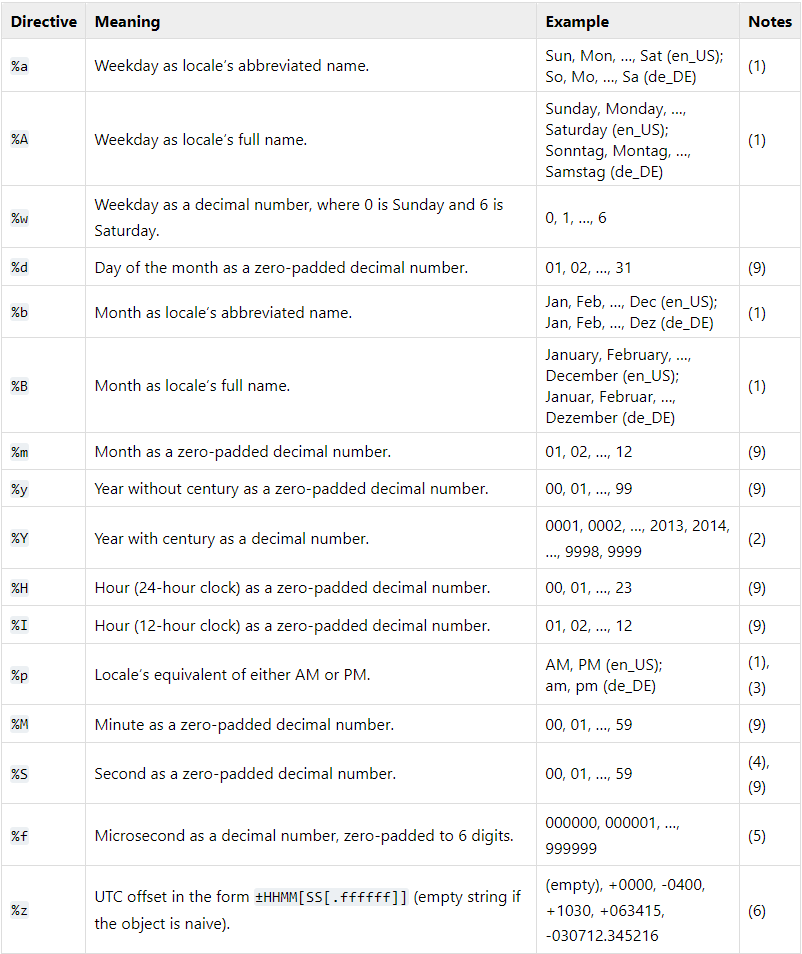

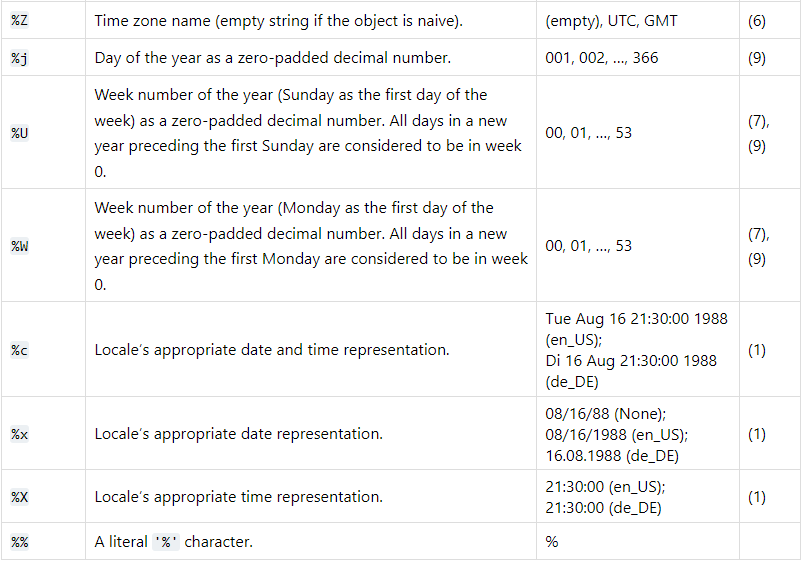